In [6]:
import pandas as pd
import numpy as np
import folium
import time


from bs4 import BeautifulSoup
from tqdm.notebook import tqdm_notebook
from selenium import webdriver

#셀레니움이 웹을 로딩하는 동안 동작할 수 있도록 하는 모듈들 정의
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC




In [142]:
#웹드라이버 설정
chrome_options = webdriver.ChromeOptions()

driver = webdriver.Chrome("./driver/chromedriver.exe",options=chrome_options)
driver.implicitly_wait(10)

startbucks_map_url = "https://www.starbucks.co.kr/store/store_map.do?disp=locale"
driver.get(startbucks_map_url)


C:\Users\offho\AppData\Local\Temp/ipykernel_13208/2002346859.py:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("./driver/chromedriver.exe",options=chrome_options)


In [20]:
#윈도우 화면 최대화
driver.maximize_window()

In [24]:
# 크롬을 열고 스타벅스 웹페이지의 F12를 누르고 "서울" 지역을 ctrl+shift+C를 눌러서 마우스로 가린킨 다음 우측에서 가리키는 html소스에서 copy to select를 선택한다

#서울을 클릭한다.
startbucks_seoul_css = "#container > div > form > fieldset > div > section > article.find_store_cont > article > article:nth-child(4) > div.loca_step1 > div.loca_step1_cont > ul > li:nth-child(1) > a"
WebDriverWait(driver,5).until(EC.presence_of_element_located((By.CSS_SELECTOR, startbucks_seoul_css))).click()

In [25]:
#서울 전체를 선택하여 목록에 서울 지역의 스탁벅스 가맹점이 모두 보이도록 한다.
startbucks_seoul_css = "#mCSB_2_container > ul > li:nth-child(1) > a"
WebDriverWait(driver,5).until(EC.presence_of_element_located((By.CSS_SELECTOR, startbucks_seoul_css))).click()

In [26]:
# 스타벅스 서울 전체 HTML 파싱
html = driver.page_source
soup = BeautifulSoup(html, "html.parser")


In [36]:

# soup 만 실행하면 파싱할 html이 출력된다.
# 서울 전체 가맹점 목록이 <div id="mCSB_3_container"에 있다.
container = soup.find("div",id="mCSB_3_container")
li_all = container.find_all("li")


'강남구'

In [37]:
# 스타벅스 데이터를 저장할 배열 생성
starbucks_data = []

# li tag에 잇는 항목들을 아래 양식에 맞게 저장
for li in li_all:
    name = li.find("strong").text.strip()
    address = li.find('p').text.strip().replace("1522-3232", "")
    gu =address.split(" ")[1]
    each = {
        "매장이름":name, "주소":address, "구":gu, "브랜드":"스타벅스"
    }
    starbucks_data.append(each)
    
# 스타벅스 항목수 출력
len(starbucks_data)


568

In [39]:
#스타벅스 데이터프레임 완성
df_starbucks = pd.DataFrame(starbucks_data)
df_starbucks.tail()

,매장이름,주소,구,브랜드
563,사가정역,서울특별시 중랑구 면목로 310,중랑구,스타벅스
564,상봉역,서울특별시 중랑구 망우로 307 (상봉동),중랑구,스타벅스
565,묵동이마트,"서울특별시 중랑구 동일로 932 (묵동, 묵동자이아파트) (묵동이마트 B1층)",중랑구,스타벅스
566,묵동,"서울특별시 중랑구 동일로 952 (묵동, 로프트원 태릉입구역) 1층",중랑구,스타벅스
567,중화역,"서울특별시 중랑구 봉화산로 35 1,2층",중랑구,스타벅스


In [56]:
#스타벅스에 DF에 저장된 "구"를 출력 해보면, 567번까지 나오고, 중복을 제거하기 위해선 unique()함수를 사용한다.
gu_list = list(df_starbucks["구"].unique())
len(gu_list)

25

In [40]:
#이디아 웹페이지 오픈
ediya_map_url = "https://www.ediya.com/contents/find_store.html"
driver.get(ediya_map_url)

In [ ]:
# 이디아 주소 검색
ediya_address_css = "#contentWrap > div.contents > div > div.store_search_pop > ul > li:nth-child(2) > a"

In [ ]:
#윈도우 화면 최대화
driver.maximize_window()

In [ ]:
# 이디아 주소 검색 선택 클릭
ediya_address_css = "#contentWrap > div.contents > div > div.store_search_pop > ul > li:nth-child(2) > a"
WebDriverWait(driver,5).until(EC.presence_of_element_located((By.CSS_SELECTOR, ediya_address_css))).click()

In [106]:
edia_data = []

# 이디아 지도 서울 > 지역별 데이터 검색
for gu in tqdm(gu_list):

    # 이디아 주소 검색어 초기화
    ediya_search_keyword_css = "#keyword"
    WebDriverWait(driver,5).until(EC.presence_of_element_located((By.CSS_SELECTOR, ediya_search_keyword_css))).clear()

    # 주소 검색을 할 수 있는 text를 선택하고 text창에 주소 입력함.
    ediya_search_keyword_css = "#keyword"
    WebDriverWait(driver,5).until(EC.presence_of_element_located((By.CSS_SELECTOR, ediya_search_keyword_css))).send_keys(f"서울 {gu}")

    # 이디아 주소 검색 선택 버튼 클릭
    ediya_search_button_css = "#keyword_div > form > button"
    WebDriverWait(driver,5).until(EC.presence_of_element_located((By.CSS_SELECTOR, ediya_search_button_css))).click()

    # 이디아 구별 매장 정보 수집
    html = driver.page_source
    soup = BeautifulSoup(html, "html.parser")
    ul_tag = soup.find ("ul", id="placesList")
    dl_all = ul_tag.find_all("dl")

    for dl in dl_all:
        name = dl.find("dt").text.strip()
        address = dl.find("dd").text.strip()
        #gu1 = address.spilt(" ")[1]
        each = {
        "매장이름":name, "주소":address, "구":gu, "브랜드":"이디아"
            }
        edia_data.append(each)
    
    

100%|██████████| 25/25 [01:10<00:00,  2.81s/it]


In [108]:
len(edia_data)

742

In [109]:
df_ediya = pd.DataFrame(edia_data)
df_ediya.tail()

,매장이름,주소,구,브랜드
737,용산중앙점,서울 용산구 한강대로 52-1 (한강로3가),중랑구,이디아
738,용산청파점,"서울 용산구 청파로71길 10 (청파동1가, 새마을금고)",중랑구,이디아
739,용산효창점,서울 용산구 효창원로66길 2 (효창동),중랑구,이디아
740,용산후암점,"서울 용산구 후암로 40-2 (후암동, 성원빌딩)",중랑구,이디아
741,원효로점,서울 용산구 원효로 257 (원효로1가),중랑구,이디아


In [114]:
df_coffee = pd.concat([df_starbucks, df_ediya])
df_coffee.reset_index(drop=True, inplace=True)
df_coffee.tail()

,매장이름,주소,구,브랜드
1305,용산중앙점,서울 용산구 한강대로 52-1 (한강로3가),중랑구,이디아
1306,용산청파점,"서울 용산구 청파로71길 10 (청파동1가, 새마을금고)",중랑구,이디아
1307,용산효창점,서울 용산구 효창원로66길 2 (효창동),중랑구,이디아
1308,용산후암점,"서울 용산구 후암로 40-2 (후암동, 성원빌딩)",중랑구,이디아
1309,원효로점,서울 용산구 원효로 257 (원효로1가),중랑구,이디아


In [117]:
import googlemaps

In [136]:
google_maps_key = "xxxx"
gmaps = googlemaps.Client(key=google_maps_key)

gmaps

In [127]:
df_coffee["위도"] = np.nan
df_coffee["경도"] = np.nan

df_coffee.tail()

,매장이름,주소,구,브랜드,위도,경도
1305,용산중앙점,서울 용산구 한강대로 52-1 (한강로3가),중랑구,이디아,NaN,NaN
1306,용산청파점,"서울 용산구 청파로71길 10 (청파동1가, 새마을금고)",중랑구,이디아,NaN,NaN
1307,용산효창점,서울 용산구 효창원로66길 2 (효창동),중랑구,이디아,NaN,NaN
1308,용산후암점,"서울 용산구 후암로 40-2 (후암동, 성원빌딩)",중랑구,이디아,NaN,NaN
1309,원효로점,서울 용산구 원효로 257 (원효로1가),중랑구,이디아,NaN,NaN


In [ ]:
# 주소에서 () 항목을 제외한 주소1를 split한 내용
df_coffee1= df_coffee
df_coffee1

str = df_coffee1['주소'][0].split("(")[1]

print (str)

df_coffee1["주소1"][0] = df_coffee1['주소'][0].split("(")[0]
df_coffee1["동"][0] = df_coffee1['주소'][0].split("(")[1]


df_coffee1


In [191]:
import requests
import urllib

def get_nominatim_geocode(address):
    url = 'https://nominatim.openstreetmap.org/search/' + urllib.parse.quote(address) + '?format=json'
    try:
        response = requests.get(url).json()
        return response[0]["lon"], response[0]["lat"]
    except Exception as e:
        # print(e)
        return None, None

for idx, rows in tqdm(df_coffee.iterrows()):
    #print(rows["주소"])
    tmp =  get_nominatim_geocode(rows["주소"].split("(")[0])
    if tmp:
        lon = tmp[0]
        lat = tmp[1]
        df_coffee.loc[idx, "위도"] = lat
        df_coffee.loc[idx, "경도"] = lon    
    else:
        print(idx, rows["주소"])
    

df_coffee

#print(response[0]["lat"])
#print(response[0]["lon"])

1310it [11:42,  1.86it/s]


,매장이름,주소,구,브랜드,위도,경도,주소1,동
0,역삼아레나빌딩,서울특별시 강남구 언주로 425 (역삼동),강남구,스타벅스,37.4748174,127.0600448,서울특별시 강남구 언주로 425,역삼동)
1,논현역사거리,서울특별시 강남구 강남대로 538 (논현동),강남구,스타벅스,37.5221061,127.0175013,서울특별시 강남구 언주로 425,역삼동)
2,신사역성일빌딩,서울특별시 강남구 강남대로 584 (논현동),강남구,스타벅스,37.5221061,127.0175013,서울특별시 강남구 언주로 425,역삼동)
3,국기원사거리,서울특별시 강남구 테헤란로 125 (역삼동),강남구,스타벅스,37.5082638,127.0606999,서울특별시 강남구 언주로 425,역삼동)
4,대치재경빌딩R,서울특별시 강남구 남부순환로 2947 (대치동),강남구,스타벅스,37.49462225,127.06276631492824,서울특별시 강남구 언주로 425,역삼동)
...,...,...,...,...,...,...,...,...
1305,용산중앙점,서울 용산구 한강대로 52-1 (한강로3가),중랑구,이디아,37.5450771,126.9718662,서울특별시 강남구 언주로 425,역삼동)
1306,용산청파점,"서울 용산구 청파로71길 10 (청파동1가, 새마을금고)",중랑구,이디아,37.5497453,126.9668688,서울특별시 강남구 언주로 425,역삼동)
1307,용산효창점,서울 용산구 효창원로66길 2 (효창동),중랑구,이디아,37.5414276,126.9631823,서울특별시 강남구 언주로 425,역삼동)
1308,용산후암점,"서울 용산구 후암로 40-2 (후암동, 성원빌딩)",중랑구,이디아,37.5496447,126.9774587,서울특별시 강남구 언주로 425,역삼동)


In [4]:
# 데이터 프레임 열 삭제
df_coffee = df_coffee.drop(['주소1','동'],axis=1)

#파일로 저장
df_coffee.to_csv("./coffee_map.csv", sep=",", encoding="utf-8")

df_coffee

NameError: name 'df_coffee' is not defined

In [8]:
df_coffee_csv = pd.read_csv ("./coffee_map.csv", encoding = "utf-8",index_col=0)
df_coffee_csv.tail()

,매장이름,주소,구,브랜드,위도,경도
1305,용산중앙점,서울 용산구 한강대로 52-1 (한강로3가),중랑구,이디아,37.545077,126.971866
1306,용산청파점,"서울 용산구 청파로71길 10 (청파동1가, 새마을금고)",중랑구,이디아,37.549745,126.966869
1307,용산효창점,서울 용산구 효창원로66길 2 (효창동),중랑구,이디아,37.541428,126.963182
1308,용산후암점,"서울 용산구 후암로 40-2 (후암동, 성원빌딩)",중랑구,이디아,37.549645,126.977459
1309,원효로점,서울 용산구 원효로 257 (원효로1가),중랑구,이디아,37.537878,126.966073


In [222]:
# Map 선언
seoul_center = [37.535855, 126.991558]
my_map = folium.Map (
    location = seoul_center,
    zoom_start = 11.5,
    tiles = "StamenToner"
)

for idx, rows in df_coffee_csv.iterrows():
    
    if rows["브랜드"] == "이디아":
        mk_color = 'blue'
        ic_color = 'yellow'
    else:
        mk_color = 'darkgreen'
        ic_color = 'lightgray'

    if np.isnan(rows["위도"]) or np.isnan(rows["경도"]): 
        continue

    folium.Marker (
        location = [rows["위도"], rows["경도"]],
        popup = rows["주소"],
        tooltip = rows["매장이름"],
        icon = folium.Icon(
            color = mk_color,
            icon_color = ic_color,
            icon = "coffee",
            prefix ="fa"
        )
    ).add_to(my_map)
    

my_map

In [9]:
df_coffee_csv.tail(2)

,매장이름,주소,구,브랜드,위도,경도
1308,용산후암점,"서울 용산구 후암로 40-2 (후암동, 성원빌딩)",중랑구,이디아,37.549645,126.977459
1309,원효로점,서울 용산구 원효로 257 (원효로1가),중랑구,이디아,37.537878,126.966073


In [10]:
 df_coffee_csv["값"] = 1
 df_coffee_csv.tail()


,매장이름,주소,구,브랜드,위도,경도,값
1305,용산중앙점,서울 용산구 한강대로 52-1 (한강로3가),중랑구,이디아,37.545077,126.971866,1
1306,용산청파점,"서울 용산구 청파로71길 10 (청파동1가, 새마을금고)",중랑구,이디아,37.549745,126.966869,1
1307,용산효창점,서울 용산구 효창원로66길 2 (효창동),중랑구,이디아,37.541428,126.963182,1
1308,용산후암점,"서울 용산구 후암로 40-2 (후암동, 성원빌딩)",중랑구,이디아,37.549645,126.977459,1
1309,원효로점,서울 용산구 원효로 257 (원효로1가),중랑구,이디아,37.537878,126.966073,1


In [11]:
df_coffee_count = df_coffee_csv.pivot_table(index = "구", columns = "브랜드", values = "값", aggfunc=np.sum)
df_coffee_count

브랜드,스타벅스,이디아
구,,
강남구,88,46
강동구,16,30
강북구,6,46
강서구,22,20
관악구,11,45
광진구,17,28
구로구,12,25
금천구,11,24
노원구,13,24


<AxesSubplot:xlabel='구'>

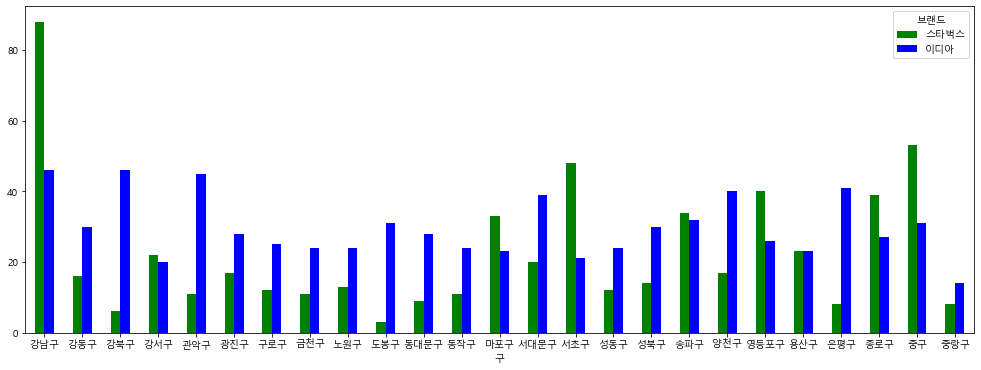

In [12]:
from matplotlib import font_manager
from matplotlib import rc

f_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc("font", family=font_name)
rc("axes", unicode_minus=False)
get_ipython().run_line_magic("matplotlib","inline")


df_coffee_count.plot.bar(rot=0, figsize=(17,6), color = ['green','blue'])

In [13]:
df_coffee_count.tail()


브랜드,스타벅스,이디아
구,,
용산구,23,23
은평구,8,41
종로구,39,27
중구,53,31
중랑구,8,14


In [35]:

import requests
import urllib

def get_nominatim_geocode1(address):
    url = 'https://nominatim.openstreetmap.org/search/' + urllib.parse.quote(address) + '?format=json'
    try:
        response = requests.get(url).json()
        return response[0]["lon"], response[0]["lat"]
    except Exception as e:
        # print(e)
        return None, None

df_coffee_count["위도"] = np.nan
df_coffee_count["경도"] = np.nan


for idx, rows in df_coffee_count.iterrows():
    
    # 피벗의 구 이름이 인덱스로 되어 있기 때문에, idx를 사용함.
    tmp =  get_nominatim_geocode1(idx)

    if tmp:
        lon = tmp[0]
        lat = tmp[1]
        df_coffee_count.loc[idx, "위도"] = lat
        df_coffee_count.loc[idx, "경도"] = lon    
    else:
        print(idx, rows["주소"])
        

In [36]:
df_coffee_count

브랜드,스타벅스,이디아,위도,경도
구,,,,
강남구,88,46,37.5177,127.0473
강동구,16,30,37.53,127.1237
강북구,6,46,37.6395,127.0255
강서구,22,20,37.5509,126.8497
관악구,11,45,37.4782,126.9518
광진구,17,28,37.5384,127.0828
구로구,12,25,37.4951999,126.8877
금천구,11,24,37.4565,126.8954
노원구,13,24,37.654,127.0567


In [39]:
# 구별로 수집된 데이터 기준으로 map에 재표현

# Map 선언
seoul_center = [37.535855, 126.991558]
my_map = folium.Map (
    location = seoul_center,
    zoom_start = 11.5,
    tiles = "StamenToner"
)

for idx, rows in df_coffee_count.iterrows():

    folium.Circle (
        location = [rows["위도"], rows["경도"]],
        radius = rows['스타벅스'] *50,
        color = 'green',
        fill_color ='green',
        popup=idx,
        tooltip = idx,
    ).add_to(my_map)
    
    folium.Circle (
        location = [rows["위도"], rows["경도"]],
        radius = rows['이디아'] *50,
        color = 'blue',
        fill_color ='blue',
        popup=idx,
        tooltip = idx,
    ).add_to(my_map)
my_map
